In [1]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

### Let's try to predict classes of Pokemon from one another.

In [2]:
# Let's load up a massively skewed dataset
df =  pd.read_csv('data/Pokemon.csv') 

In [3]:
df[["Name", "HP", "Attack", "Defense","isLegendary"]]

,Name,HP,Attack,Defense,isLegendary
0,Bulbasaur,45,49,49,False
1,Ivysaur,60,62,63,False
2,Venusaur,80,82,83,False
3,Charmander,39,52,43,False
4,Charmeleon,58,64,58,False
...,...,...,...,...,...
716,Yveltal,126,131,95,True
717,Zygarde,108,100,121,True
718,Diancie,50,100,150,True
719,Hoopa,80,110,60,True


In [4]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


### Let's plot out our Pokemon stat-by-stat to see how Legendary stats differ from non-Legendary pokemon

<Axes: xlabel='Attack', ylabel='Defense'>

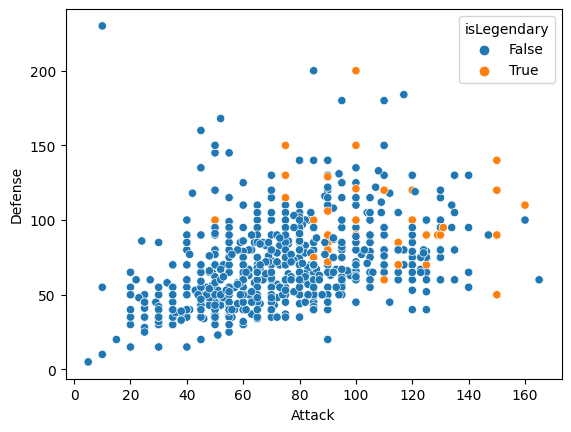

In [5]:
sns.scatterplot(data=df, x="Attack", y="Defense", hue="isLegendary")

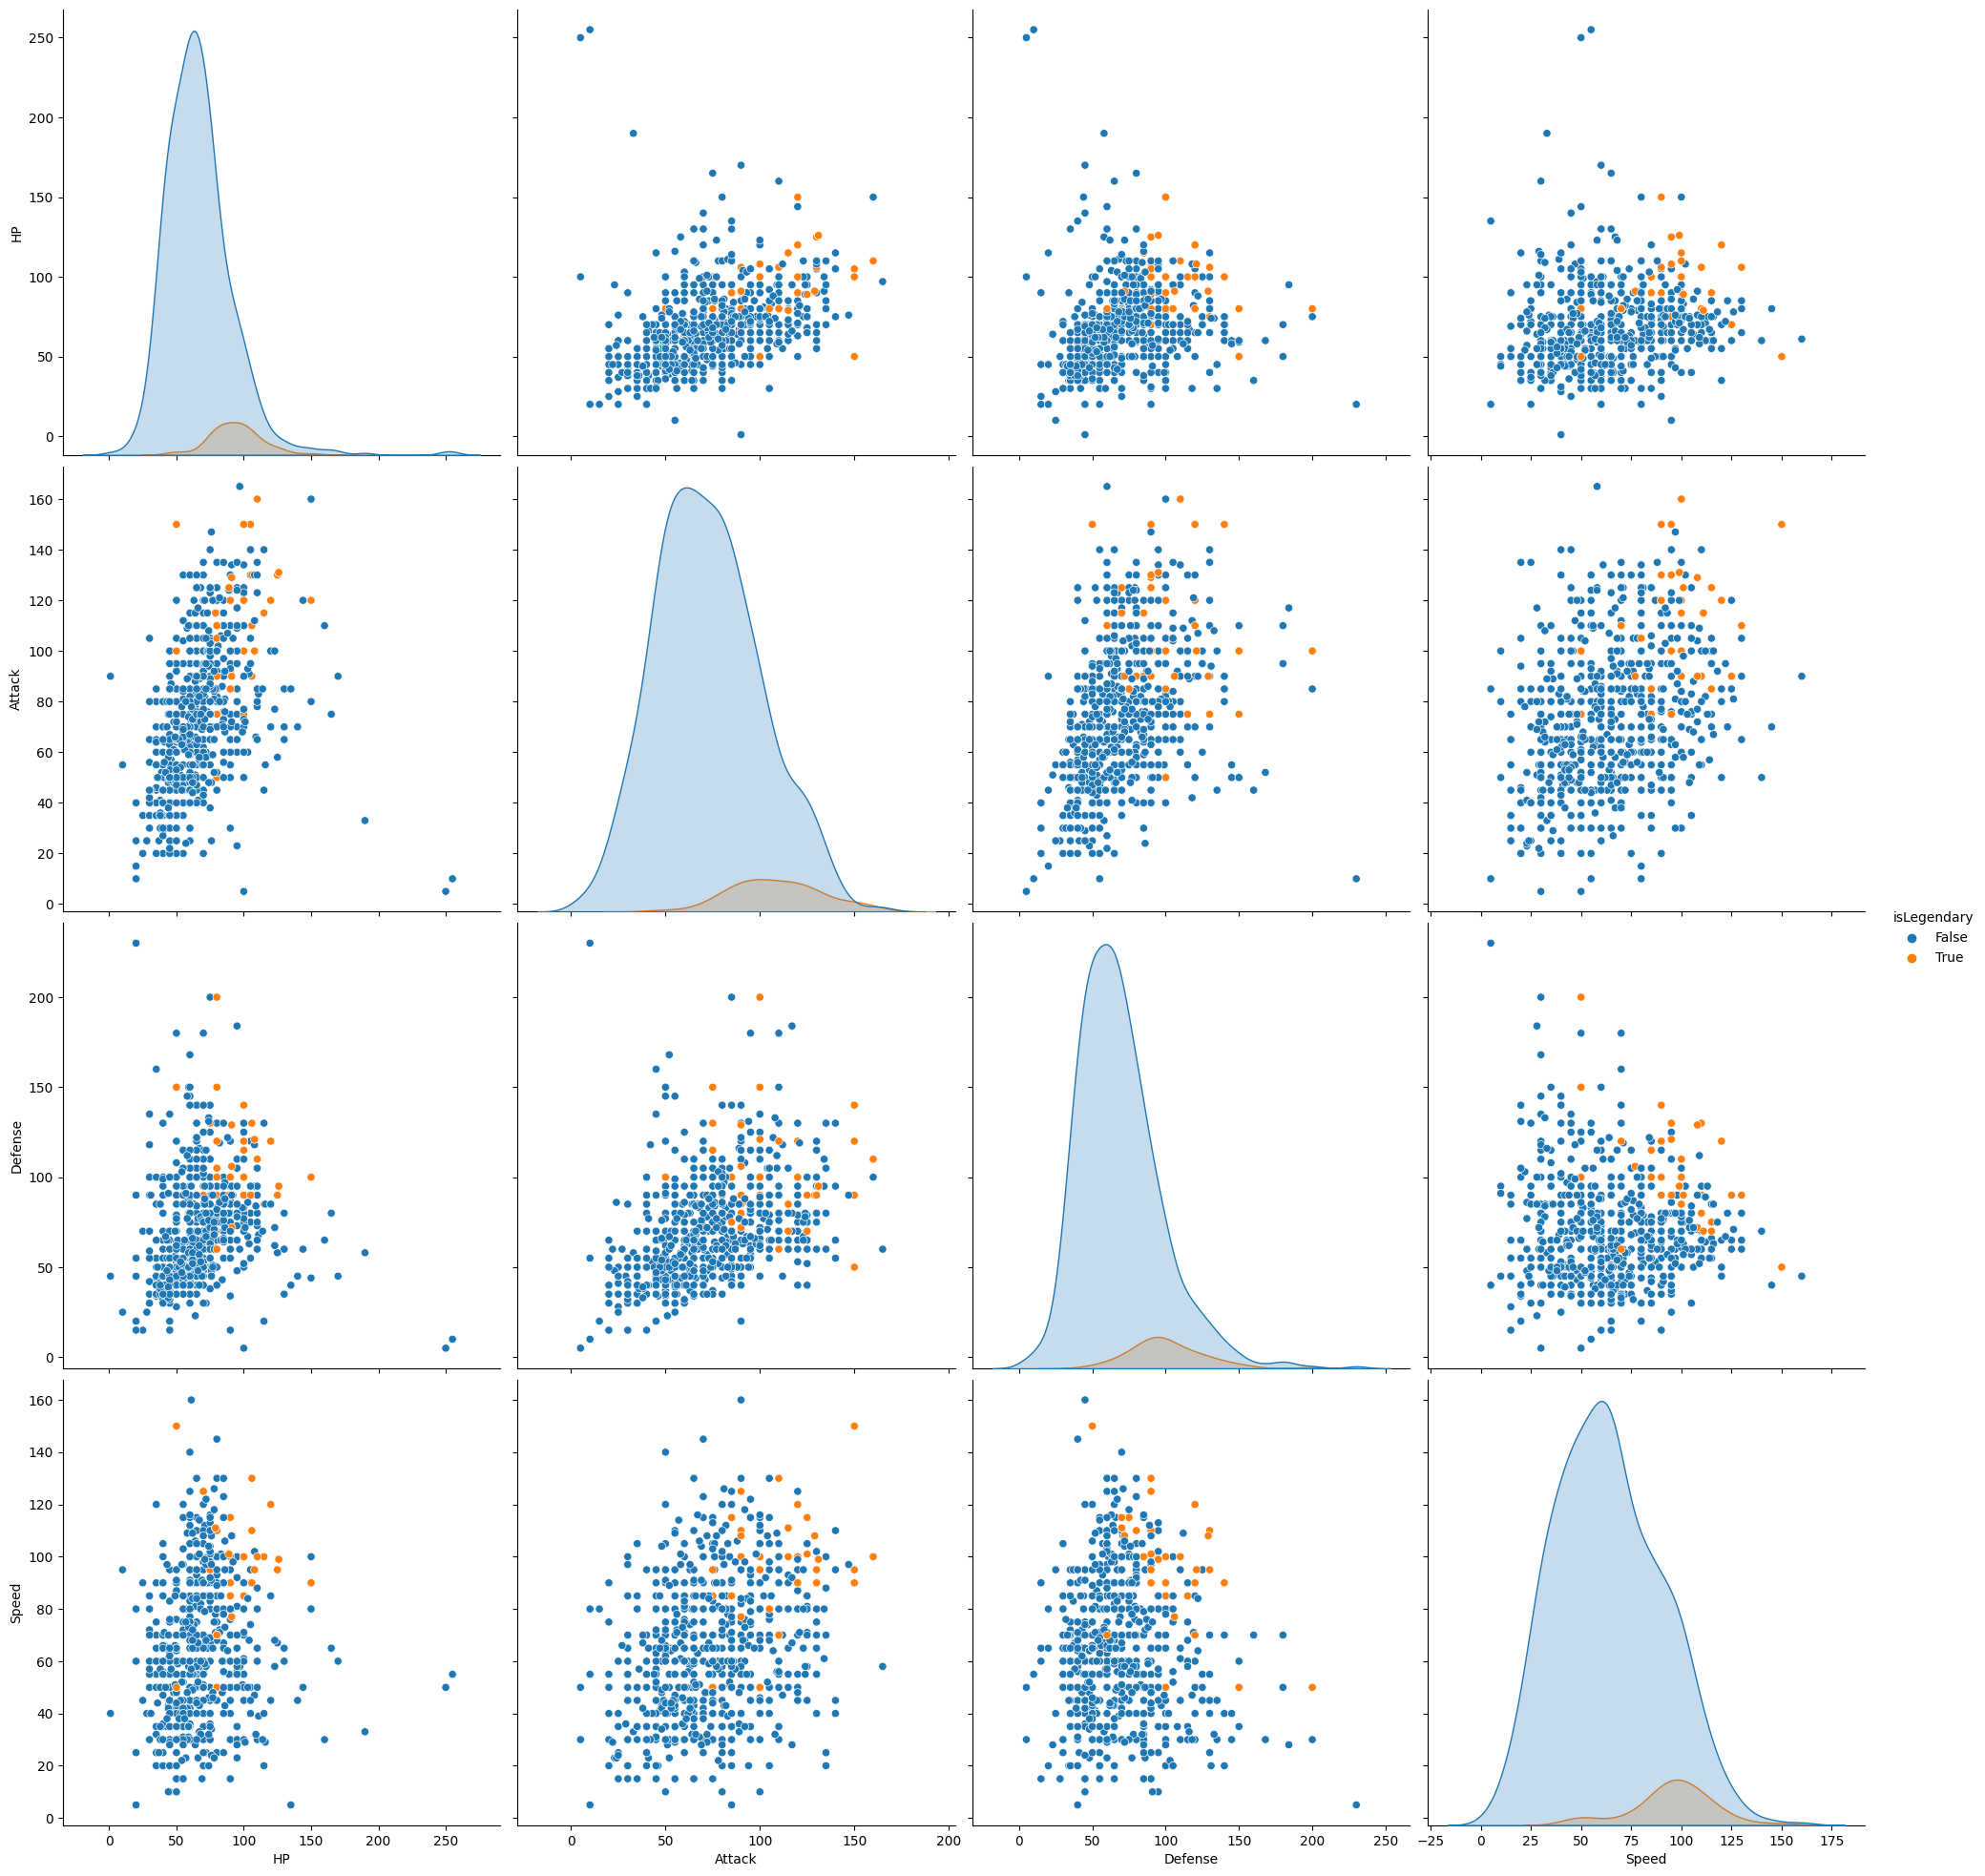

In [6]:
sns.pairplot(df, hue="isLegendary", x_vars=["HP", "Attack", "Defense", "Speed"],
                 y_vars=["HP", "Attack", "Defense", "Speed"], size=5)

### Test and Training Split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Test and Training Split

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isLegendary"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=13)


In [8]:
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [9]:
print("Train Accuracy:",train_accuracy)
print("Train Precision:",metrics.precision_score(Y_train, pred_train))

print("Test Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Test Precision:",metrics.precision_score(Y_test, pred_test))

Train Accuracy: 0.9662698412698413
Train Precision: 0.6792452830188679
Test Accuracy: 0.9861751152073732
Test Precision: 0.7692307692307693


### Upsampling Demonstration

In [10]:
# Balancing class instances

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isLegendary"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_legendary = X[X.isLegendary==False]
legendary = X[X.isLegendary==True]

# upsample minority
legendary_upsampled = resample(legendary,
                          replace=True, # sample with replacement
                          n_samples=len(not_legendary), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
legendary_upsampled = pd.concat([not_legendary, legendary_upsampled])

# check new class counts
legendary_upsampled.isLegendary.value_counts()

isLegendary
False    469
True     469
Name: count, dtype: int64

In [11]:
Y_train = legendary_upsampled["isLegendary"]
X_train = legendary_upsampled.drop('isLegendary', axis=1)

In [78]:
legendary_upsampled = LogisticRegression(class_weight="balanced").fit(X_train, Y_train)

upsampled_pred = legendary_upsampled.predict(X_test)
pred_train = legendary_upsampled.predict(X_train)
pred_test =  legendary_upsampled.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)


In [12]:
print("Train Accuracy:",train_accuracy)
print("Train Precision:",metrics.precision_score(Y_train, pred_train))

print("Test Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Test Precision:",metrics.precision_score(Y_test, pred_test))

Train Accuracy: 0.9662698412698413


ValueError: Found input variables with inconsistent numbers of samples: [938, 504]

### K Folds Cross Validation

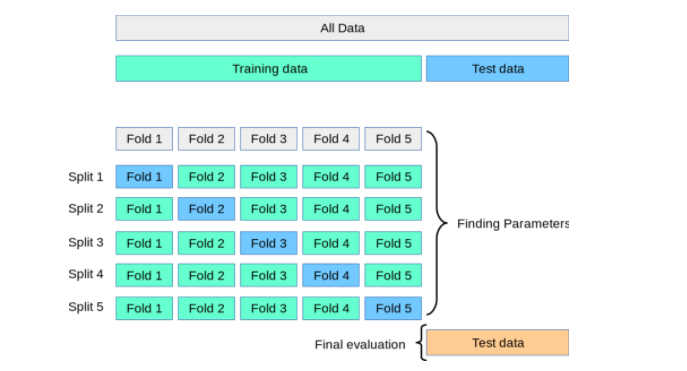

In [13]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [18]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, label='Validation')
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        plt.grid(True)
        plt.show()

In [19]:
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]

logistic_model = LogisticRegression(class_weight="balanced")
log_kfolds_result = cross_validation(logistic_model, X, df["isLegendary"], 5)

In [20]:
print(log_kfolds_result)

{'Training Accuracy scores': array([0.97395833, 0.97573657, 0.97573657, 0.97573657, 0.97400347]), 'Mean Training Accuracy': 97.50343009820914, 'Training Precision scores': array([0.70588235, 0.7254902 , 0.7254902 , 0.7254902 , 0.71153846]), 'Mean Training Precision': 0.7187782805429864, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([0.82758621, 0.84090909, 0.84090909, 0.84090909, 0.83146067]), 'Mean Training F1 Score': 0.8363548307562254, 'Validation Accuracy scores': array([0.9862069 , 0.97222222, 0.97222222, 0.96527778, 0.95833333]), 'Mean Validation Accuracy': 97.08524904214559, 'Validation Precision scores': array([1.        , 0.69230769, 0.69230769, 0.64285714, 0.6       ]), 'Mean Validation Precision': 0.7254945054945054, 'Validation Recall scores': array([0.8, 1. , 1. , 1. , 1. ]), 'Mean Validation Recall': 0.96, 'Validation F1 scores': array([0.88888889, 0.81818182, 0.81818182, 0.7826087 , 0.75      ]), 'Mean Val

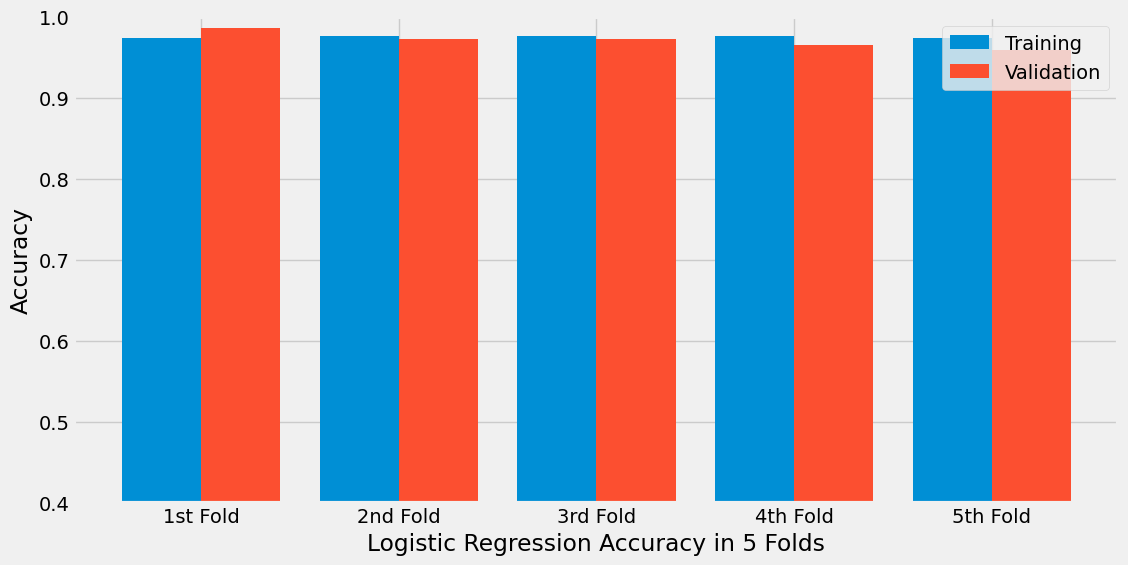

In [21]:
plt.style.use('fivethirtyeight')

plot_result("Logistic Regression Accuracy in 5 Folds",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            log_kfolds_result["Training Accuracy scores"],
            log_kfolds_result["Validation Accuracy scores"])

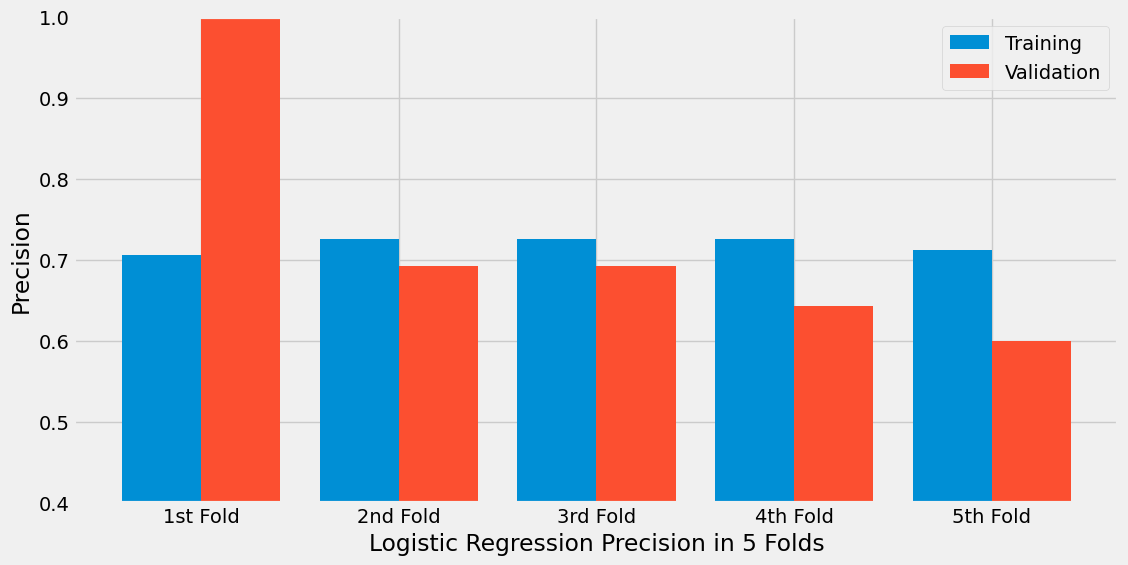

In [22]:
plot_result("Logistic Regression Precision in 5 Folds",
            "Precision",
            "Preision scores in 5 Folds",
            log_kfolds_result["Training Precision scores"],
            log_kfolds_result["Validation Precision scores"])